<a href="https://colab.research.google.com/github/tsnzzhr/AirQualityUCI_Cluster/blob/main/5_Cluster_Single_Linkage_Hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
filename = 'AirQualityUCI.csv'

#Read csv
file = pd.read_csv(filename, nrows=4000)
file = file.drop('Date', axis = 1)
file = file.drop('Time', axis = 1)
print ("Shape of dataset: ", file.shape)

file.head(5)

Shape of dataset:  (4000, 13)


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         4000 non-null   float64
 1   PT08.S1(CO)    4000 non-null   int64  
 2   NMHC(GT)       4000 non-null   int64  
 3   C6H6(GT)       4000 non-null   float64
 4   PT08.S2(NMHC)  4000 non-null   int64  
 5   NOx(GT)        4000 non-null   int64  
 6   PT08.S3(NOx)   4000 non-null   int64  
 7   NO2(GT)        4000 non-null   int64  
 8   PT08.S4(NO2)   4000 non-null   int64  
 9   PT08.S5(O3)    4000 non-null   int64  
 10  T              4000 non-null   float64
 11  RH             4000 non-null   float64
 12  AH             4000 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 406.4 KB


In [4]:
print ("Shape of dataset after cleaning: ", file.size)
file[[ 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
        'PT08.S5(O3)','T', 'RH', 'AH']] =file[[ 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 
        'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)','T', 'RH', 'AH']].apply(pd.to_numeric, errors='coerce')
file = file.dropna()
file = file.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", file.size)
file.head(5)

Shape of dataset after cleaning:  52000
Shape of dataset after cleaning:  52000


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [5]:
featureset = file[['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)','T', 'RH', 'AH','PT08.S3(NOx)','PT08.S1(CO)']]

In [6]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.9735704 , 0.25197984, 0.8818144 , 0.53982301, 0.72286374,
        0.87326247, 0.8727209 , 0.99296273, 0.58664176, 0.69642857],
       [0.97068717, 0.22462203, 0.87141074, 0.44690265, 0.6743649 ,
        0.87203598, 0.86851332, 0.99280297, 0.64175619, 0.66607143],
       [0.97164825, 0.20734341, 0.86974615, 0.48820059, 0.72517321,
        0.86631235, 0.89060309, 0.99292514, 0.62587576, 0.71517857],
       [0.97164825, 0.20158387, 0.87057844, 0.54867257, 0.74364896,
        0.86263287, 0.91164095, 0.99310567, 0.60345633, 0.70357143],
       [0.96876502, 0.18070554, 0.85934249, 0.48820059, 0.72979215,
        0.86345053, 0.91023843, 0.99311606, 0.6562354 , 0.65714286]])

In [7]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'single')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:

from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',

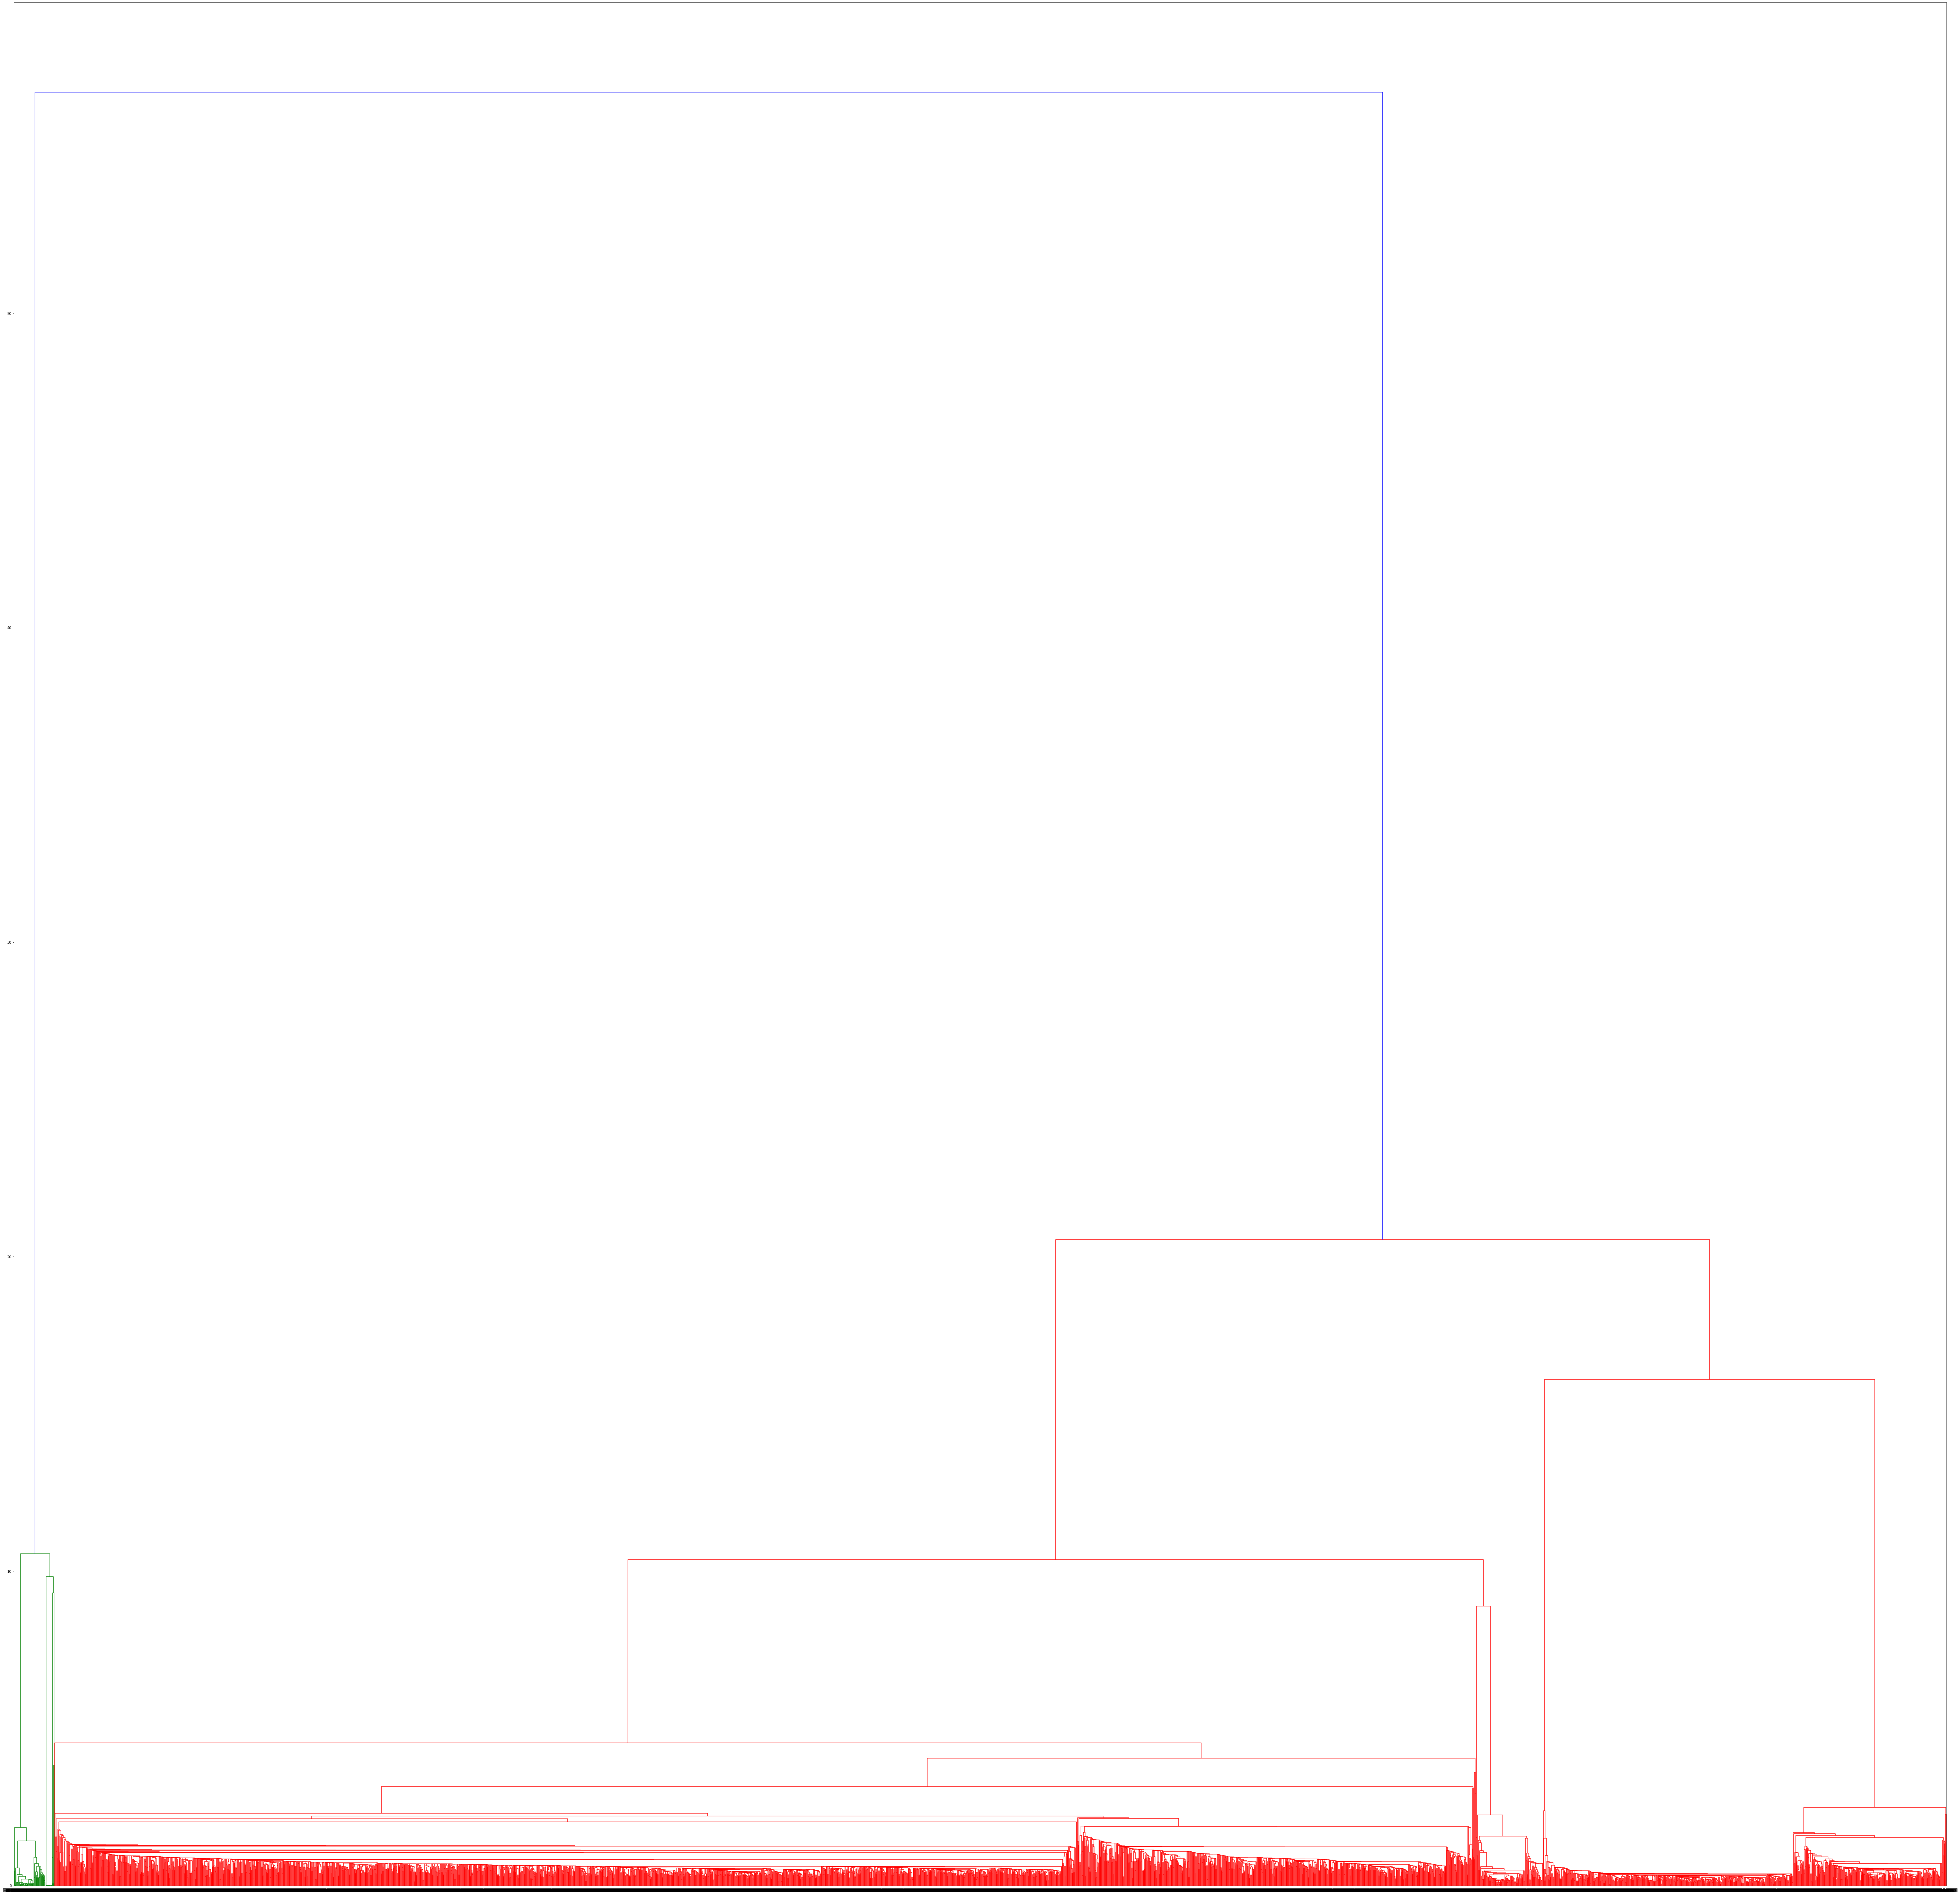

In [10]:
from scipy.cluster.hierarchy import dendrogram

fig = pylab.figure(figsize=(100,100))
def llf(id):
    return '[%s %s]' % (file['PT08.S1(CO)'][id], file['PT08.S3(NOx)'][id] )
    
dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12)